<a href="https://colab.research.google.com/github/cheysreylin/Machinelearning/blob/main/Unit2_Regression_Simple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # for to plot the graph

from sklearn import datasets
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 

In [ ]:
# dataset
from google.colab import files
upload = files.upload()

Saving FuelConsumption.csv to FuelConsumption.csv


In [ ]:
dataset = pd.read_csv('FuelConsumption.csv')
dataset.head(10)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,2014,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
6,2014,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,11.8,8.1,10.1,28,232
7,2014,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,12.8,9.0,11.1,25,255
8,2014,ACURA,TL AWD,MID-SIZE,3.7,6,M6,Z,13.4,9.5,11.6,24,267
9,2014,ACURA,TSX,COMPACT,2.4,4,AS5,Z,10.6,7.5,9.2,31,212


In [ ]:
# Linear - clean the dataset

In [ ]:
# select the variable ( x, y)
# x : independent variable => FUELCONSUMPTION_HWY
# y : dependent variable => CO2EMISSIONS 
x_variable = ['FUELCONSUMPTION_HWY'] # only one variable in x
y_variable = ['CO2EMISSIONS'] # only one variable in y

# reshape the input value ( dataset )to give the input to the model 
# x = np.array(dataset[x_variable]).reshape(-1, len(x_variable)) 
x = np.array(dataset[x_variable]).reshape(-1, 1)  # (-1, length of variable x ) 
# OR we can write  x = dataset[x_variable].value.reshape(-1, 1)

y = np.array(dataset[y_variable]).reshape(-1, 1)
print(x.shape)
print(y.shape)

(1067, 1)
(1067, 1)


In [ ]:
# split dataset into two part for training and one for testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2) # 20% for testing, 80% for training
print(x_test)
print(x_train)

In [ ]:
# Build the model ( simple linear regression )
Linear_regression = LinearRegression() # model is ready !

In [ ]:
# give input into model ( Training process )
model = Linear_regression.fit(x_train, y_train) # fit the training value into the model

# y_hat = Q.0(intercept) + Q.1(slope) * x


In [ ]:
# Finding intercept and slope (coefficient)
Q_0 = model.intercept_  
print(Q_0)

Q_1 = model.coef_
print(Q_1)

[73.28321002]
[[19.2828793]]


In [ ]:
# Result prediction 

# lot of x value and y value
# single x value and y = ?

# predict the result using the whole dataset
y_predict = model.predict(x_test)  # use x_test to predict the value for the whole dataset
print(y_predict)

In [ ]:
# to predict only the single value of the results
x_assumption = np.array([250]) # if "FeulCONSUMPTION_HWY" value is 250, what is the the answer of y (C02EMISSION)
x_assumption = x_assumption.reshape(-1,1)

y_predict = model.predict(x_assumption)
print(y_predict)

[[4950.09751216]]


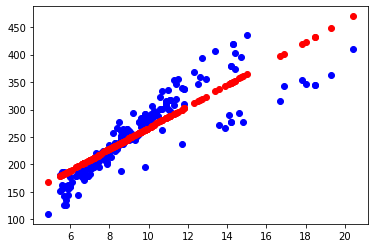

In [ ]:
# plot the graph 
plt.scatter(x_test, y_test, color = 'Blue')

# plt.plot(x_test, y_predict, color = 'Red') => ( for linear line)
plt.scatter(x_test, y_predict, color = 'Red')
plt.show()

In [ ]:
# Find Mean square error
from sklearn.metrics import mean_squared_error
print("Mean Squared Error : ", mean_squared_error(y_test, y_predict))

# Find absulote error
from sklearn.metrics import mean_absolute_error as MAE
print("Mean Absolute Error : ", MAE(y_test, y_predict ))

# Find R^2 
from sklearn.metrics import r2_score
R_Square = r2_score(y_test, y_predict)
print("R^2 : ", R_Square)





Mean Squared Error :  1019.1284882367962
Mean Absolute Error :  23.60907089342884
R^2 :  0.754939800943901
